<a href="https://colab.research.google.com/github/aitorfacio/03MIAR_04_B_2023-24_Algoritmos_de_Optimizacion/blob/main/RETOS/Retos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retos

## Aitor Facio Valero

Collab: https://colab.research.google.com/drive/1CwbLUi-vI4VnAGqgmbx2Sr8my4a1wYJj?usp=sharing

GitHub: https://github.com/aitorfacio/03MIAR_04_B_2023-24_Algoritmos_de_Optimizacion/blob/main/RETOS/Retos.ipynb

In [ ]:
# imports generales
import matplotlib.pyplot as plt

# Reto VC-1

## Implementa el algoritmo de la Criba de Erastótenes para encontrar número primos. Encuentra los números primos entre los 10.000 primeros números naturales

In [ ]:
# Criba de Erastótenes
# Escribe a ti tu código
def eratostenes_sieve(limit):
    # creamos la lista inicial de todos los números enteros entre el 2 (el 1 no lo tendremos en cuenta) y el límite
    numbers = list(range(2, limit+1)) # limit + 1 porque la función range genera los enteros en el intervalo [start, end)
    multiples = [] # en esta lista guardaremos los números que encontremos que sean múltiplos de otros enteros
    for candidate in numbers:
        if candidate not in multiples:
            multiples += [x for x in numbers if x % candidate == 0 and x > candidate] # añadimos a la lista todos los múltiplos de candidato
    return sorted(list(set(numbers) - set(multiples))) # devolvemos una lista ordenada de todos los números eliminando los múltiplos primero

# añado otra implementación de la criba de Eratóstenes usando numpy para comparar si el uso de las operaciones vectorizadas de
# numpy influye en el timepo de ejecución
import numpy as np
def eratostenes_sieve_np(limit):
     # creamos la lista inicial de todos los números enteros entre el 2 (el 1 no lo tendremos en cuenta) y el límite
    numbers = np.arange(2, limit+1)
    multiples = []
    index = 0
    while index < len(numbers):
        # tomamos el siguiente elemento de los números que no hemos eliminado del conjunto de candidatos
        candidate = numbers[index]
        # filtro para detectar todos los números mayores que 'candidate' y que son múltiplos del mismo
        multiplo = (numbers % candidate == 0) & (numbers > candidate)
        # eliminamos esos números de la lista de números por examinar
        numbers = numbers[~multiplo]
        # tomamos el siguiente candidato
        index += 1
    return list(numbers)

primos_100 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
primos_1000 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97,
               101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197,
               199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293,
               307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
               401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499,
               503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599,
               601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691,
               701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797,
               809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887,
               907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
assert( eratostenes_sieve(100) == primos_100)
assert( eratostenes_sieve_np(100) == primos_100)
assert( eratostenes_sieve(1000) == primos_1000)
assert( eratostenes_sieve_np(1000) == primos_1000)
%timeit eratostenes_sieve(10000)
%timeit eratostenes_sieve_np(10000)


The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached.
3.41 s ± 1.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
36.7 ms ± 7.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Reto VC-2

## Opción 1: Implementa una solución al problema de las 8 reinas en un tablero 8x8

In [ ]:
# Ocho reinas
# Escribe aquí tu código
# El problema se representará mediante una lista de una dimensión.
# El índice [0...n] representa a una columna y el número en cada celda indica la fila en la que está una reina
# así, si un tablero de 4x4 es una lista de 4 elementos y tiene la siguiente forma: [1,3,2,4]
# las reinas estarán en las casillas (1,1), (3,2), (2,3), (4,4)

# Un tablero será solución si:
# - está totalmente relleno
# - todos los elementos son distintos
# - ninguna reina está en la diagonal de otra
def es_solucion(n, tablero, verbose=False):
    verbose and print(f"Comprobando si {tablero} es solución")
    # todos rellenos
    todos_rellenos = all([ x != 0 for x in tablero])
    if not todos_rellenos:
        return False
    # todos son distintos
    todos_distintos = len(set(tablero)) == len(tablero)
    verbose and print(f"Todos Distintos: {todos_distintos}")
    if not todos_distintos:
        return False

    # no están en la diagonal
    posiciones = [(index + 1, x) for index, x in enumerate(tablero)]
    verbose and print(f"Posiciones: {posiciones}")
    for index, (i, j) in enumerate(posiciones):
        d1, d2 = diagonales(i, j, n)
        verbose and print(f"Diagonales de ({i}, {j}: {d1}, {d2}")
        for i2, j2 in posiciones[index+1:]:
            verbose and print(f"({i2},{j2}) en diagonales?")
            if (i2,j2) in d1 or (i2,j2) in d2:
                verbose and print(True)
                return False
            else:
                verbose and print(False)

    else:
        return True

#dada una casilla (i,j) y un tamaño n, devuelve la tupla de diagonales que se cruzan en (i,j)
def diagonales(i0,j0, n):
    i, j = i0, j0
    diagonal_1 = []
    while i >= 1 and j >= 1:
        diagonal_1.append((i, j))
        i -= 1
        j -= 1
    i, j = i0+1, j0+1
    while i <= n and j <= n:
        diagonal_1.append((i,j))
        i += 1
        j += 1
    diagonal_2 = []
    i, j = i0, j0
    while i >= 1 and j <= n:
        diagonal_2.append((i,j))
        i -= 1
        j += 1
    i, j = i0+1, j0-1
    while i <= n and j >= 1:
        diagonal_2.append((i,j))
        i += 1
        j -= 1
    return diagonal_1, diagonal_2

def queens(n, pos=0, tablero=None, verbose=False):
    if not tablero:
        tablero = [0] * n

    if pos == n:
        return tablero

    #Partiendo de un tablero vacío, voy colocando por filas
    for x in range(1, n+1):
        verbose and print(f"Intentando colocar {x} en tablero {tablero}")

        # La fila no puede estar ya ocupada porque las reinas se amenazarían
        if x not in tablero:
            verbose and print("Colocado!")
            tablero[pos] =  x
            verbose and print(f"Recursividad pos:{pos}, tablero:{tablero}")
            #teniendo un candidato a solución, buscamos más colocaciones que desemboquen en una solución válida
            #empezando en la siguiente posición
            tablero = queens(n, pos+1, tablero, verbose)
            verbose and print(f"Fin recursividad, tablero:{tablero}")
            if es_solucion(n, tablero, verbose):
                return tablero
    # Si llegamos aquí, no hemos encontrado la solución, eliminamos el elemento que hemos puesto y devolvemos
    # el tablero sin cambiar para que la ejecución superior vuelva a intentar otra solución (backtracking)
    else:
        tablero[pos] = 0
    return tablero

%timeit -n 1 -r 1 queens(8)
#pintar_tablero(queens(10))
tablero = queens(10)

32.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


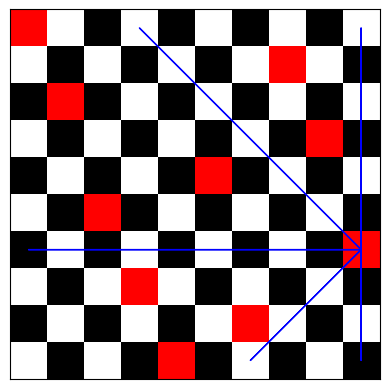

In [ ]:
def pintar_tablero(tablero):
    '''Este método pinta en ASCII un tablero para visualizar la solución'''
    n = len(tablero)
    tablero_entero = d = [[0 for y in range(n)] for x in range(n)]
    for index, col in enumerate(tablero):
        if col != 0:
            tablero_entero[col-1][index] = "X"
    print("\n".join([ " ".join([str(r) for r in c]) for c in tablero_entero]))

def plot_tablero(ax, tablero, highlight_attacks_of_queen=None):
    '''Est método pinta con matplotlib una solución y marca las líneas de ataque de una de las reinas si así se indica con el parámetro
    "highlight_attacks_of_queen".
    Representa las reinas como casillas rojas y, si se representan los ataques, los muestra sencuencialmente por cada una de las reinas.
    '''
    from matplotlib.colors import ListedColormap

    n = len(tablero)
    even_row = [0 if x % 2 == 0 else 1 for x in range(n)]
    odd_row = [1 if x % 2 == 0 else 0 for x in range(n)]
    image = np.array([even_row if x % 2 == 0 else odd_row for x in range(n)])

    image = image.reshape((n, n))

    for col, row in enumerate(tablero):
        image[row-1][col] = 2

    cmap = ListedColormap(['k', 'w', 'r'])
    ax.matshow(image, cmap=cmap, extent=(1, n+1, n+1, 1))
    ax.set_xticks([])
    ax.set_yticks([])


    if highlight_attacks_of_queen is not None:
        r, c = tablero[highlight_attacks_of_queen], highlight_attacks_of_queen +1
        diag1, diag2 = diagonales(r,c, n)
        diag1 = sorted(diag1)
        diag2 = sorted(diag2)
        y, x = diag1[0]
        dy, dx = diag1[-1]
        dx -= (x)
        dy -= (y)
        ax.arrow(x + .5, y + .5, dx , dy, color='b', length_includes_head = True)
        y, x = diag2[0]
        dy, dx = diag2[-1]
        dx -= (x)
        dy -= (y)
        ax.arrow(x + .5, y + .5, dx , dy, color='b', length_includes_head = True)
        dx, dy = (n-1) - r, c - (n-1)
        dx, dy = 0, n  - r
        ax.arrow(c + .5, r + .5, dx, dy, color='b')
        dx, dy = n - c  , 0
        ax.arrow(c + .5, r + .5, dx, dy, color='b')
        dx, dy = 0, -r  + 1
        ax.arrow(c + .5, r + .5, dx, dy, color='b')
        dx, dy = -c + 1, 0
        ax.arrow(c + .5, r + .5, dx, dy, color='b')
    plt.show()

from IPython.display import display, clear_output
fig, ax = plt.subplots(1,1)
for index, _ in enumerate(tablero):
    ax.clear()
    plot_tablero(ax, tablero, index)
    display(fig)
    clear_output(wait=True)
    plt.pause(2)

## Opción 2: Implementa una solución del problema de las Torres de Hanoi para un número arbitrario n de fichas

In [ ]:
# Torres de Hanoy
# Escribe aquí tu código

# La siguiente clase representa a una pila de Hanoi
# internamente usa una estructura de pila implementada con una lista
# y tiene métodos que comprueban, por ejemplo, que no se añada un disco
# mayor sobre uno menor, para gestionar el sacar o meter discos de la pila
class PilaHanoi:
    @classmethod
    def pila_llena(cls, n):
        '''Este método de clase devuelve una instancia de pila
        llena de discos desde el número n (abajo del todo) hasta el 1(arriba)
        '''
        p = cls(n)
        for i in range(n,0, -1):
            p.push(i)
        return p

    def __init__(self, size):
        self.size = size
        self._queue = []

    def push(self, disco):
        if disco > self.size or disco in self._queue:
            return False

        if len(self._queue) > 0:
            if self._queue[-1] > disco:
                self._queue.append(disco)
                return True
            else:
                return False
        else:
            self._queue.append(disco)
            return True

    def pop(self):
        return self._queue.pop()

    def __str__(self):
        return str(self._queue)

    def __repr__(self):
        return str(self)

    def __eq__(self, other):
        return self.size == other.size and self._queue == other._queue

    def __len__(self):
        return len(self._queue)

    def empty(self):
        return len(self) == 0

    def top(self):
        return self._queue[-1]

    def as_list(self, padded=True):
        the_list = list(self._queue)
        return the_list + [0] * (self.size - len(the_list))

# Aceptamos la solución si las dos primeras pilas están vacías y la tercera es una pila llena, es decir, con los discos ordenados
def es_solucion(pilas, n):
    return pilas[0].empty() and pilas[1].empty() and pilas[2] == PilaHanoi.pila_llena(n)

def mover_torre(n, pilas, pila_origen, pila_destino, pila_buffer, movimientos):
    if n == 2:
        # Si solo tenemos que mover 2 discos, estamos en el caso base
        # cogemos el primer elemento de la pila origen
        top_element = pilas[pila_origen].pop()
        # lo ponemos en la pila que usaremos como pivote
        pilas[pila_buffer].push(top_element)
        # guardamos este movimiento
        movimientos.append([p.as_list() for p in pilas])
        # cogemos el segundo elemento a mover de la pila origen
        bottom_element = pilas[pila_origen].pop()
        # lo ponemos en la pila de destino
        pilas[pila_destino].push(bottom_element)
        # guardamos este movimiento
        movimientos.append([p.as_list() for p in pilas])
        # quitamos el disco de arriba de la pila pivote
        top_element = pilas[pila_buffer].pop()
        # y lo colocamos en la pila de destino
        pilas[pila_destino].push(top_element)
        # guardamos este movimiento
        movimientos.append([p.as_list() for p in pilas])

    elif n > 2:
        # Si no estamos en el caso base, usamos un razonamiento recursivo.
        # necesitamos mover toda la pila por encima del último disco a la pila de pivote
        # después, movemos el disco de abajo a la pila de destino
        # y movemos a la subpila a la de destino, encima del disco que acabamos de poner

        # la pila origen es la misma pero intercambiamos las otras pilas porque el destino de la subtorre queremos que, temporalmente,
        # sea la pila buffer o pivote
        mover_torre(n-1, pilas, pila_origen, pila_buffer, pila_destino, movimientos)
        # después de quitar la subtorre, cogemos el disco de arriba del todo de la pila de origen
        top_element = pilas[pila_origen].pop()
        # lo colocamos en la pila de destino
        pilas[pila_destino].push(top_element)
        # guardamos el movimiento
        movimientos.append([p.as_list() for p in pilas])
        # y ahora movemos la subtorre a la pila de destino
        mover_torre(n-1, pilas, pila_buffer, pila_destino, pila_origen, movimientos)


def hanoi(n, pilas=None):
    if not pilas:
        pilas = [PilaHanoi.pila_llena(n), PilaHanoi(n), PilaHanoi(n)]

    # la lista movimientos va a contener todos los movimientos necesarios para solucionar el problema
    movimientos = [[p.as_list() for p in pilas]]

    mover_torre(n, pilas, 0, 2, 1, movimientos)

    return pilas, movimientos
n = 10
pilas, movimientos = hanoi(n)

print(f"Resolver las Torres de Hanoi de {n} discos requiere {len(movimientos)} movimientos.")

Resolver las Torres de Hanoi de 10 discos requiere 1024 movimientos.


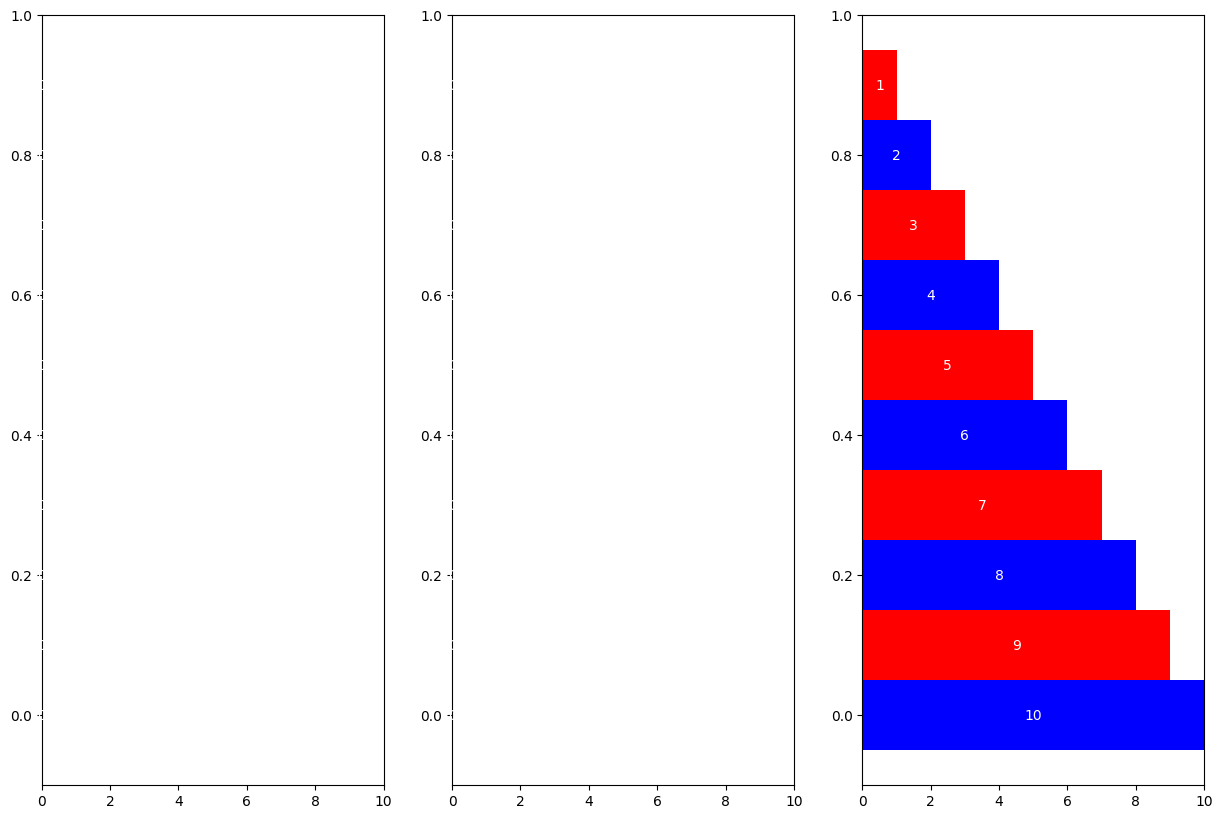

In [ ]:
# En línea con la representación de las n reinas, el código de abajo ofrece una visualización gráfica de los movimientos para solucionar el problema de las torres de Hanoi resuelto en la celda de arriba
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def plot_hanoi_towers(towers, fig, ax):

    for index, t in enumerate(towers):
        colors = ['blue' if index %2 == 0 else 'red' for index, x in enumerate(t)]
        y = [0.1 * index for index,_ in enumerate(t)]

        g = ax[index].barh(y, t, color=colors, height=0.1, label=[str(x) for x in t])
        ax[index].bar_label(g, label_type="center", color="white")
        ax[index].set_xlim([0, len(t)])

    plt.show()

fig, ax = plt.subplots(1,3, figsize=(15, 10))
for towers in movimientos:
    for a in ax:
        a.clear()
    plot_hanoi_towers(towers, fig, ax)
    display(fig)
    clear_output(wait=True)
    #plt.pause(0.1)

# Reto

## Implemente el código del descenso por gradiente para la regresión lineal.

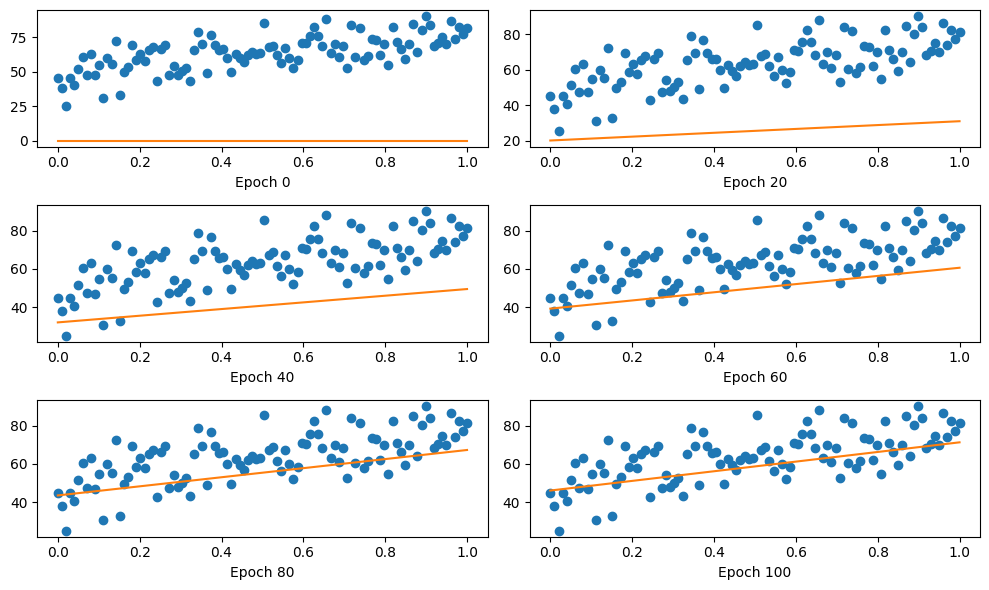

In [ ]:
import random
import math
import numpy as np

# función que calcula el valor de una regresión lineal (ecuación de la recta)
def linear_regression(x, w1, w0):
    regression = w1*x + w0
    return regression

# función de coste
def cost(x, y):
    return lambda w0, w1: np.sum((w0 + w1 * x - y) ** 2) /len(y)

# derivada parcial de la función de coste respecto al parámetro w0
def derivative_w_0(x, y):
        return lambda w0, w1: 2/len(x) * np.sum(w0 + w1 * x - y)

# derivada parcial de la función de coste respecto al parámetro w1
def derivative_w_1(x, y):
        return lambda w0, w1: 2/len(x) * np.sum((w0 + w1 * x - y) * x)


def generate_linear_data(n, w1, w0, noise=0):
    x = np.linspace(0, 1, n)  # Genera valores de x en un rango de 0 a 1
    y = w1 * x + w0 + np.random.normal(0, noise, n)  # Genera los valores de y usando la ecuación de la regresión lineal y agrega ruido opcional
    return x, y

data_x, data_y = generate_linear_data(100, 32, 47, 10)


def linear_regression_gradient_descent(data_x, data_y, epochs=10, lr=0.0001, epsilon=0.001):
    '''método generador que en cada iteración va a entregar al código que lo llame los valores actualizados de los parámetros w1 y w0
    Acepta como parámetros los datos en X e Y, el número de epochs, el learning rate y el epsilon que nos permitirá finalizar de manera
    anticipada el cálculo por haber llegado a una solución aceptable
    '''
    funcion_coste = cost(data_x, data_y)
    funcion_derivada_coste_w0 = derivative_w_0(data_x, data_y)
    funcion_derivada_coste_w1 = derivative_w_1(data_x, data_y)

    # iniciamos los parámetros a 0
    w1 = 0
    w0 = 0
    # entregamos al código que ha llamado los valores iniciales
    yield w1, w0
    for i in range(epochs):
        # calculamos el coste para comparar con el coste tras la iteración
        coste = funcion_coste(w0,w1)
        # evalamos las derivadas parciales que servirán para actualizar los parámetros
        derivada_w0 = funcion_derivada_coste_w0(w0, w1)
        derivada_w1 = funcion_derivada_coste_w1(w0, w1)
        # junto con el LR actualizamos los parámetros de la regresión lineal
        w1 = w1 - lr * derivada_w1
        w0 = w0 - lr * derivada_w0
        #print(f"Step {i}, w1:{w1}, w0:{w0}")
        # calculamos el nuevo coste tras actualizar los parámetros
        nuevo_coste = funcion_coste(w0, w1)
        evolucion_coste = np.abs(nuevo_coste - coste)
        if evolucion_coste < epsilon:
            # si hemos llegado a una solución, cortamos la ejecución
            break
        # si no, entregamos los pesos calculados y esperamos a la siguiente iteración
        yield w1, w0
    # entregamos los pesos finales
    yield w1, w0

n_epochs = 100
plot_each = n_epochs // 5 # representaremos la recta de regresión lineal en intervalos depeendientes del número de epochs para visualizar la evolución
lr = 0.01

cols = 2
rows = (n_epochs//plot_each) // cols + 1


fig, axes = plt.subplots(rows, cols, figsize=(10,6))
nrow, ncol = 0,0
for epoch_number, (w1, w0) in enumerate(linear_regression_gradient_descent(data_x, data_y, n_epochs, lr)):
    # cada iteración provoca una nueva epoch en el cálculo del descenso del gradiente
    if epoch_number % plot_each == 0:
        # cada "plot_each" epochs dibujamos una gráfica con los pesos en ese momento
        regresion_y = [linear_regression(x, w1, w0) for x in data_x]
        ax = axes[nrow][ncol]
        ax.plot(data_x, data_y, 'o', label='y')
        ax.plot(data_x, regresion_y)
        ax.set_xlabel(f'Epoch {epoch_number}')
        ncol += 1
        if ncol == cols:
            ncol = 0
            nrow += 1
plt.tight_layout()
plt.show()

# Optimización de la función f(x)=sin(1/2∗x2−1/4∗y2+3)∗cos(2∗x+1−ey) mediante el algoritmo por descenso del gradiente.


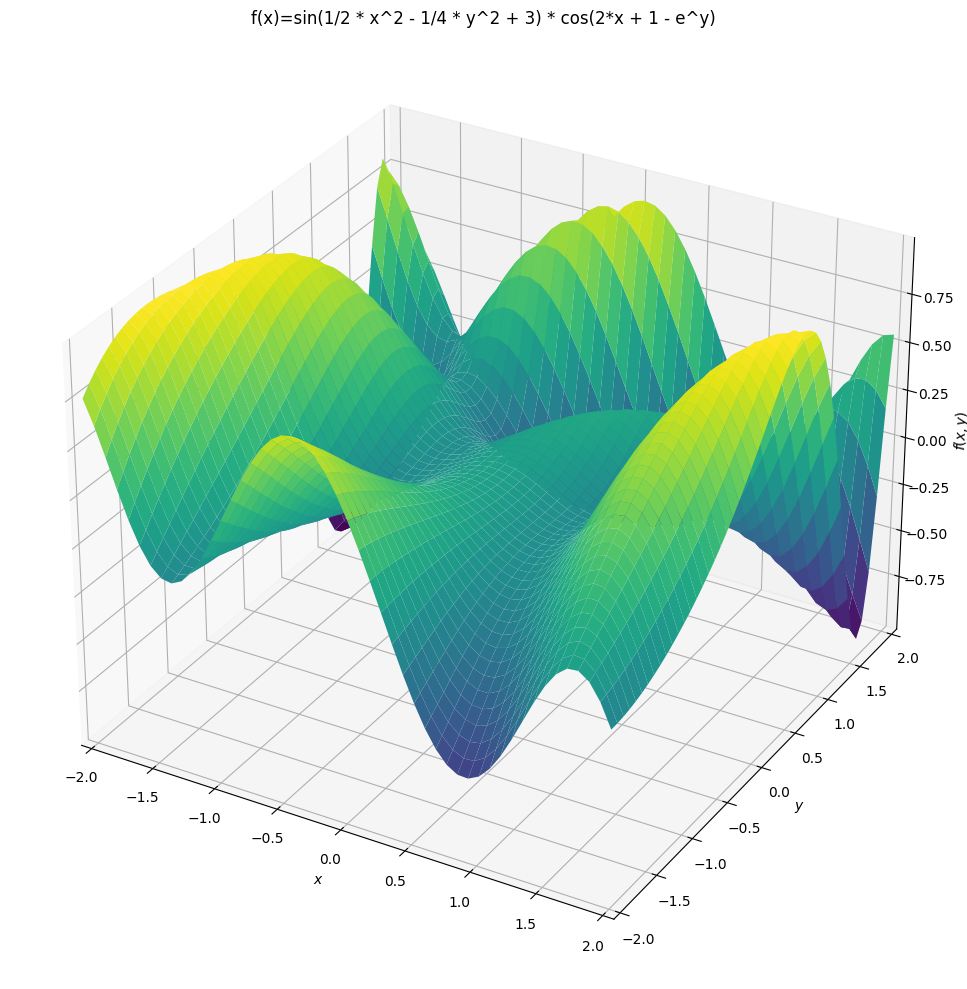

In [ ]:
from sympy.functions.elementary.trigonometric import sin, cos
from sympy.functions.elementary.exponential import exp
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df_x0 = lambda X: X[0] * math.cos(1/2 * X[0]**2 - 1/4 * X[1] **2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]) ) - \
        2 * math.sin(1/2 * X[0]**2 - 1/4 * X[1] ** 2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]) )
df_x1 = lambda X: -1/2 ** X[1] * math.cos(1/2 * X[0] ** 2 - 1/4 * X[1] **2 +3) * math.cos(2*X[0] + 1 - math.exp(X[1]) ) - \
        math.exp(X[1]) * math.sin(1/2 * X[0] ** 2 - 1/4 * X[1] **2 +3) * math.sin (2*X[0] +1 - math.exp(X[1]) )
df = lambda X: [ df_x0(X), df_x1(X)]

x,y = symbols('x y')
plotting_f = lambda x,y: sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y) )
plot3d(plotting_f(x,y),
       (x,-2,2),(y,-2,2),
       title='f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)',
       size=(10,10))

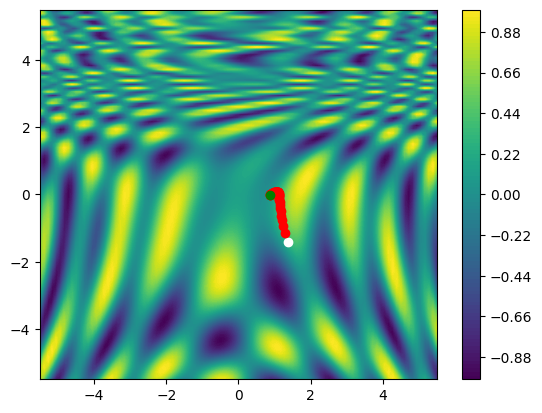

Solucion: [0.8684018405699865, -0.010722873669428517] 0.04099849908029072


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=0.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

# Implementar el algoritmo de búsqueda tabú para el TSP de la AG3.

In [1]:
!pip install requests    #Hacer llamadas http a paginas de la red
!pip install tsplib95    #Modulo para las instancias del problema del TSP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random                     #Para generar valores aleatorios


#http://elib.zib.de/pub/mp-testdata/tsp/tsplib/
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)

In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())

In [4]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

In [5]:
def genera_vecina_swap(solucion, i, j):
    solucion[i], solucion[j] = solucion[j], solucion[i]
    return solucion

def algoritmo_tabu(problem, n_tabu, n_iter):
    solucion_referencia = crear_solucion(Nodos)
    print(solucion_referencia)
    mejor_solucion = solucion_referencia
    mejor_distancia = distancia_total(solucion_referencia, problem)

    tabu = []

    for iteracion in range(n_iter):
        candidatos = []
        for i in range(len(mejor_solucion)):
            for j in range(i+1, len(mejor_solucion)):
                vecina = genera_vecina_swap(mejor_solucion[:], i, j)
                distancia_vecina = distancia_total(vecina, problem)

                if vecina not in tabu and distancia_vecina < mejor_distancia:
                    candidatos.append(vecina)

        if len(candidatos) == 0:
            break

        candidatos.sort(key=lambda x, problem=problem: distancia_total(x, problem))
        mejor_solucion = candidatos[0]
        mejor_distancia = distancia_total(mejor_solucion, problem)
        tabu.append(mejor_solucion)
        if len(tabu) > n_tabu:
            tabu.pop(0)
    return mejor_solucion, mejor_distancia

sol_tabu = algoritmo_tabu(problem, 50, 100)
print(sol_tabu)

[0, 1, 38, 11, 20, 26, 16, 29, 17, 41, 9, 22, 35, 36, 10, 15, 12, 18, 30, 21, 24, 32, 6, 8, 5, 39, 27, 19, 23, 33, 31, 34, 40, 7, 28, 14, 2, 25, 13, 37, 3, 4]
([0, 1, 26, 18, 12, 11, 25, 10, 8, 28, 2, 27, 7, 36, 35, 31, 32, 30, 29, 21, 24, 40, 23, 41, 9, 39, 22, 38, 34, 33, 20, 17, 37, 15, 16, 14, 19, 13, 5, 6, 4, 3], 1574)
